Julia Pawluś, Kamil Sarzyniak, Piotr Stawarski 


Przewidywanie przyszłych wartości ceny zamknięcia (Close) z wykorzystaniem metody Fuzzy Time Series.

In [33]:
#pip install -U pyFTS
import pyFTS
import pandas as pd
import numpy as np
np.int = int

In [16]:
from pyFTS.data import Bitcoin

In [17]:
df = Bitcoin.get_dataframe()

In [18]:
df.head()

,Date,Open,High,Low,Close,Volume,AVG
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0,0.049510
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,5,0.070152
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,49,0.084235
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,20,0.077902
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,42,0.074875


In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df.set_index('Date', inplace=True)


In [21]:
print(df.head())

               Open     High      Low    Close  Volume       AVG
Date                                                            
2010-07-16  0.04951  0.04951  0.04951  0.04951       0  0.049510
2010-07-17  0.04951  0.08585  0.05941  0.08584       5  0.070152
2010-07-18  0.08584  0.09307  0.07723  0.08080      49  0.084235
2010-07-19  0.08080  0.08181  0.07426  0.07474      20  0.077902
2010-07-20  0.07474  0.07921  0.06634  0.07921      42  0.074875


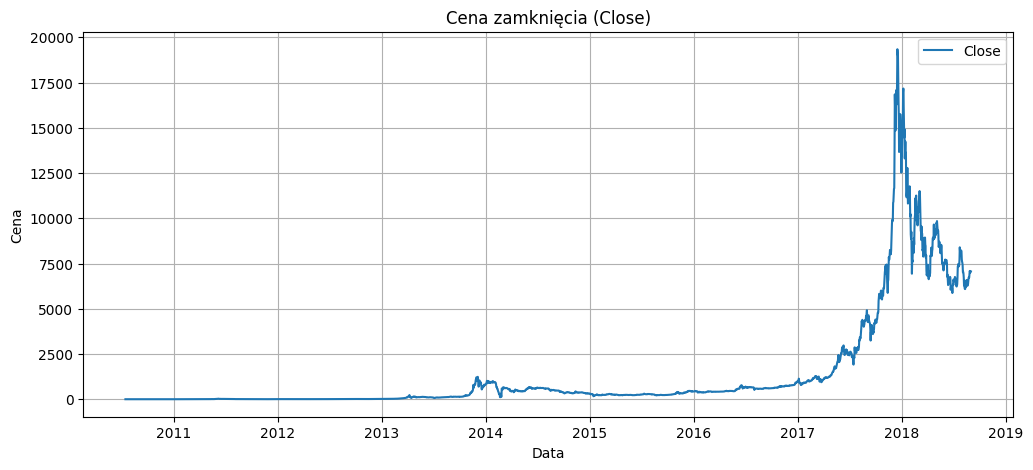

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Close')
plt.title("Cena zamknięcia (Close)")
plt.xlabel("Data")
plt.ylabel("Cena")
plt.grid(True)
plt.legend()
plt.show()


In [25]:
series = df['Close'].dropna().values

min_val = min(series)
max_val = max(series)

print(f"Zakres danych: min = {min_val:.2f}, max = {max_val:.2f}")

Zakres danych: min = 0.05, max = 19345.49


In [26]:
from pyFTS.partitioners import Grid

# 10 rozmytych zbiorów 
partitioner = Grid.GridPartitioner(data=series, npart=10)


In [27]:
# Zobaczmy etykiety i zakresy zbiorów
for s in partitioner.sets:
    print(s)


A0
A1
A2
A3
A4
A5
A6
A7
A8
A9


c:\Python310\lib\site-packages\pyFTS\partitioners\partitioner.py:238: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(ticks)


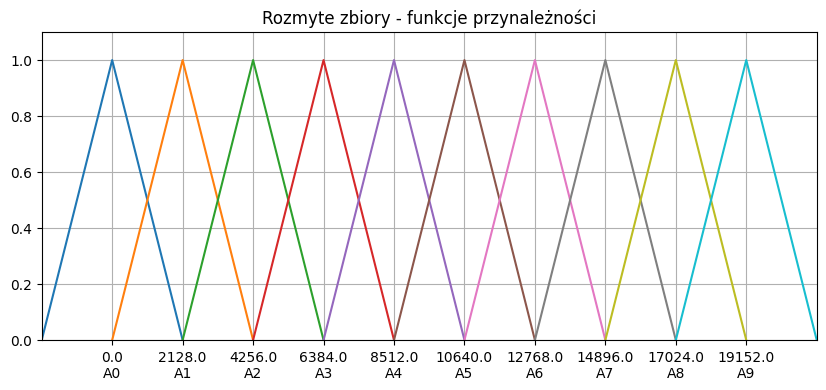

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))  
partitioner.plot(ax)                   
plt.title("Rozmyte zbiory - funkcje przynależności")
plt.grid(True)
plt.show()



In [34]:
from pyFTS.models import chen

# Tworzenie modelu Fuzzy Time Series typu Chen
model_chen = chen.ConventionalFTS(partitioner=partitioner)

# Trenowanie modelu
model_chen.fit(series)


In [35]:
# Predykcja na podstawie serii danych
predicted_chen = model_chen.predict(series)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(series[1:], predicted_chen[1:])
rmse = mean_squared_error(series[1:], predicted_chen[1:])**0.5

print(f"MAE (Chen): {mae:.4f}")
print(f"RMSE (Chen): {rmse:.4f}")


MAE (Chen): 790.2869
RMSE (Chen): 850.5441


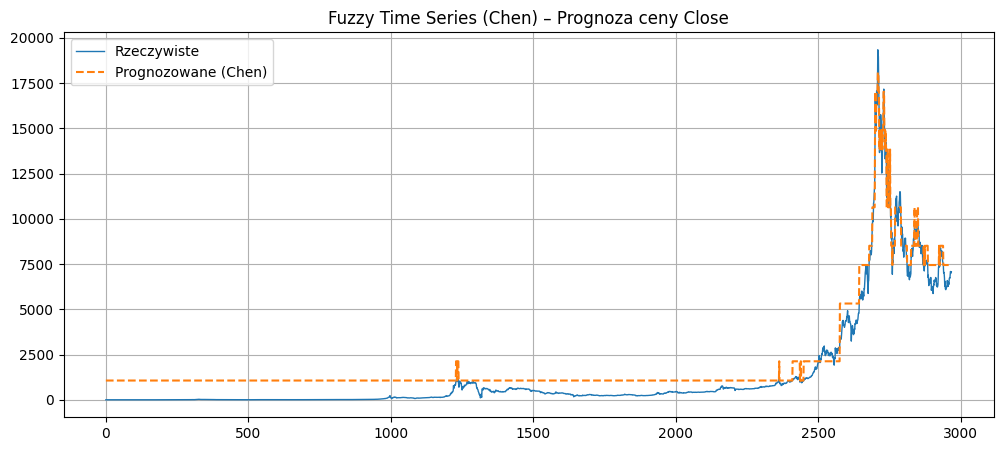

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(series, label='Rzeczywiste', linewidth=1)
plt.plot(predicted_chen, label='Prognozowane (Chen)', linestyle='--')
plt.title("Fuzzy Time Series (Chen) – Prognoza ceny Close")
plt.legend()
plt.grid(True)
plt.show()


 Zrobić modele WeightedFTS,  HighOrderFTS itd